<a href="https://colab.research.google.com/github/Hanan-Aref03/Machine_Learning_Projects/blob/main/Hanan_Aref_ML_Challenge_1_Loan_Acceptance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Science Lifecycle
© 2024, Zaka AI, Inc. All Rights Reserved.

---
##Case Study: Loan Status
**Objective:**
In this exercise, we will explore a dataset of Loan data with the below info. We will try later to predict the status of loan for individuals based the following information.</font>

## DataSet Description

- **Loan_ID:** data set unique ID <br>
- **Gender:** individual gender<br>
- **Married:** individual marital status<br>
- **Dependents:** number of dependents<br>
- **Education:** individual education status<br>
- **Self_Employed:** individual employment status<br>
- **ApplicantIncome:** individual income<br>
- **CoapplicantIncome:** individual Coapplicant income<br>
- **LoanAmount:** Loan amount in thousands<br>
- **Loan_Amount_Term:** term of loan in months<br>
- **Credit_History:** credit history meets guidelines<br>
- **Property_Area:** Urban/ Semi Urban/ Rural<br>
- **Loan_Status:** loan approved (Y/N)<br>

# 1. Import necessary python modules (libraries)
<br>
We will need the following libraries:

- Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
- Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
- Matplotlib & seaborn — plotting & visualization.
- scikit-learn — a tool for data mining and machine learning models. We will need from it the following functions: LabelEncoder, train_test_split, LogisticRegression, and accuracy_score

In [ ]:
#Test Your Zaka
# For scientific computing
import numpy as np

# For data manipulation and analysis
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning models and preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Choose a Seaborn style (darkgrid, ticks, dark, etc.)
sns.set(style="darkgrid")
# Choose a Matplotlib style (ggplot, seaborn-colorblind, bmh, classic, etc.)
plt.style.use("ggplot")

# 2. Read & visualize data
To load the data to our code, we use pandas module, more specifically, the read_csv function.

Combine the two dataset in order to apply the same preprocessing steps in both dataframes
Don't forget to print the head of your dataset to get a better insight into it.

In [ ]:
#Test Your Zaka
train_data=pd.read_csv('sample_data/train.csv')
test_data=pd.read_csv('sample_data/test.csv')

# Load the train and test datasets
#train_data = pd.read_csv('sample_data/california_housing_train.csv')
#test_data = pd.read_csv('sample_data/california_housing_test.csv')
# Print the first few rows of both datasets to inspect
print("Train Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())

# Summary statistics for training data
print("\nTrain Data Summary:")
print(train_data.describe())

df=pd.concat([train_data,test_data],ignore_index=True)
df.head()




Train Data:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2       

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 3. Exploratory Data Analysis


Start by getting the number of rows and the number of columns that you have in your dataset

In [ ]:
df=pd.read_csv('sample_data/test.csv')
df.head()

rows=df.shape[0]
columns=df.shape[1]
print(f"Number of rows:{rows} \nNumber of columns:{columns}")

Number of rows:101 
Number of columns:13


##### Use the function info(), to check:

- data types (int, float, or object (e.g., string))
- missing values
- memory usage
- number of rows and columns

In [ ]:
#Test Your Zaka
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            101 non-null    object 
 1   Gender             98 non-null     object 
 2   Married            101 non-null    object 
 3   Dependents         98 non-null     object 
 4   Education          101 non-null    object 
 5   Self_Employed      96 non-null     object 
 6   ApplicantIncome    101 non-null    int64  
 7   CoapplicantIncome  101 non-null    int64  
 8   LoanAmount         97 non-null     float64
 9   Loan_Amount_Term   101 non-null    int64  
 10  Credit_History     94 non-null     float64
 11  Property_Area      101 non-null    object 
 12  Loan_Status        101 non-null    object 
dtypes: float64(2), int64(3), object(8)
memory usage: 10.4+ KB


Where did you find some missing values?     

**[Share your Zaka here]**



##### Use the function describe(), to check the following  values for each numerical feature (column)
- mean
- standard deviation
- maximum
- minimum


In [ ]:
#Test Your Zaka
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,101.000000,101.000000,97.000000,101.000000,94.000000
mean,4928.277228,2047.297030,154.948454,336.475248,0.819149
std,3619.679986,5360.438819,96.885066,73.227945,0.386959
min,416.000000,0.000000,9.000000,36.000000,0.000000
25%,2894.000000,0.000000,102.000000,360.000000,1.000000
50%,3652.000000,1032.000000,132.000000,360.000000,1.000000
75%,5800.000000,2306.000000,182.000000,360.000000,1.000000
max,19484.000000,41667.000000,600.000000,480.000000,1.000000


Print the unique values of the variable Credit_History

In [ ]:
#Test Your Zaka
unique_Credit_History=df['Credit_History'].unique()
print(unique_Credit_History)

[ 1.  0. nan]


Do the same with the variable Loan_Amount_Term

In [ ]:
#Test Your Zaka
unique_Loan_Amount_Term=df['Loan_Amount_Term'].unique()
print("Unique Loan_Amount_Term",unique_Loan_Amount_Term)

Unique Loan_Amount_Term [180 360 480  36  84 240]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### Use the function describe(include='o'), to check the following  values for each categorical feature:
* count
* unique
* top
* freq


In [ ]:
#Test Your Zaka
categorical= df.select_dtypes(include=['object']).columns
categorical=df.describe(include='O')
categorical

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,101,98,101,98,101,96,101,101
unique,101,2,2,4,2,2,3,2
top,LP002648,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,80,68,50,77,81,41,67


Interpret the results you obtained for the variable Gender

The `Gender` variable contains some missing values, with data available for 601 out of 614 entries. It has two unique categories: Male and Female. The most frequent category is Male, appearing 489 times, as indicated by the frequency (`freq`).

Compute the frequency for each unique value in the categorical feature specified in the code cells below

In [ ]:
#Test Your Zaka
#Property_Area
df['Property_Area'].value_counts()
df['Property_Area'].value_counts(normalize=True)

,proportion
Property_Area,
Semiurban,0.405941
Rural,0.336634
Urban,0.257426


In [ ]:
#Test Your Zaka
#Dependents
df['Dependents'].value_counts()

,count
Dependents,
0,50
2,19
1,18
3+,11


Create a new dataframe removeNA_df, where you remove the nulls existing in the original dataframe. This is only for being able to visualize distributions. In a later step, we will be focusing on cleaning our original dataset in a better way

In [ ]:
#Test Your Zaka
removeNA_df=df.dropna()

Plot the distribution and the boxplot for the variable 'LoanAmount'

{'whiskers': [<matplotlib.lines.Line2D at 0x797fdcb58b50>,
 'caps': [<matplotlib.lines.Line2D at 0x797fdcb5bb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x797fdcb5b670>],
 'medians': [<matplotlib.lines.Line2D at 0x797fe1f3af80>],
 'fliers': [<matplotlib.lines.Line2D at 0x797fe1f3a290>],
 'means': []}

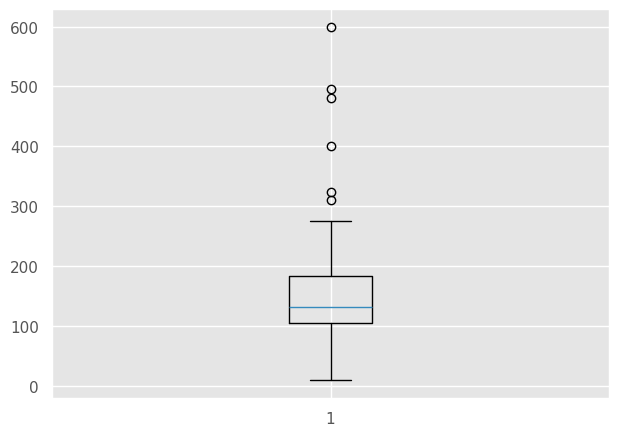

In [ ]:
#Test Your Zaka
plt.boxplot(removeNA_df['LoanAmount'])


* Is there any outlier?
* Is the data skewed?

Yes, there are several outliers in the data. The distribution is positively skewed, as evidenced by the median being closer to the minimum value.

Do the same for the variable 'ApplicantIncome'

{'whiskers': [<matplotlib.lines.Line2D at 0x797fe05f5720>,
 'caps': [<matplotlib.lines.Line2D at 0x797fe05f6200>,
 'boxes': [<matplotlib.lines.Line2D at 0x797fe05f55d0>],
 'medians': [<matplotlib.lines.Line2D at 0x797fe05f5cc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x797fe05f7190>],
 'means': []}

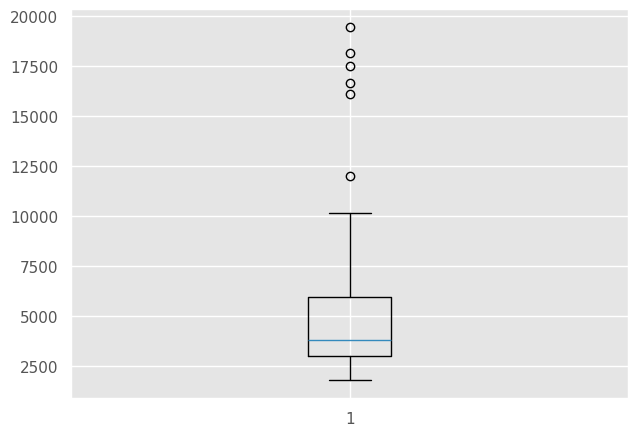

In [ ]:
#Test Your Zaka
plt.boxplot(removeNA_df['ApplicantIncome'])

* Is there any outlier?
* Is the data skewed?

Yes, there are many outliers in the data. The distribution is positively skewed, as the median is closer to the minimum value.

Do the same for 'CoapplicantIncome'

{'whiskers': [<matplotlib.lines.Line2D at 0x79802522dde0>,
 'caps': [<matplotlib.lines.Line2D at 0x79802522ebc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79802522dd80>],
 'medians': [<matplotlib.lines.Line2D at 0x79802522d360>],
 'fliers': [<matplotlib.lines.Line2D at 0x79802522d300>],
 'means': []}

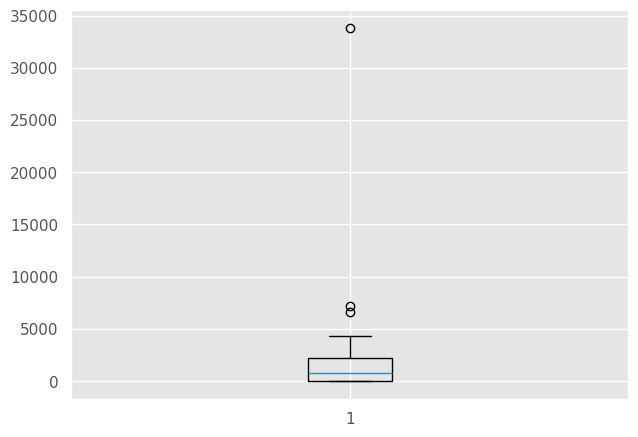

In [ ]:
#Test Your Zaka
plt.boxplot(removeNA_df['CoapplicantIncome'])

Yes, there are numerous outliers in the data, and the distribution exhibits negative skewness.

Do the same for 'Loan_Amount_Term'

{'whiskers': [<matplotlib.lines.Line2D at 0x797fe1487fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x797fe1484160>,
 'boxes': [<matplotlib.lines.Line2D at 0x797fe05c4ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x797fe14841c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x797fe1484d60>],
 'means': []}

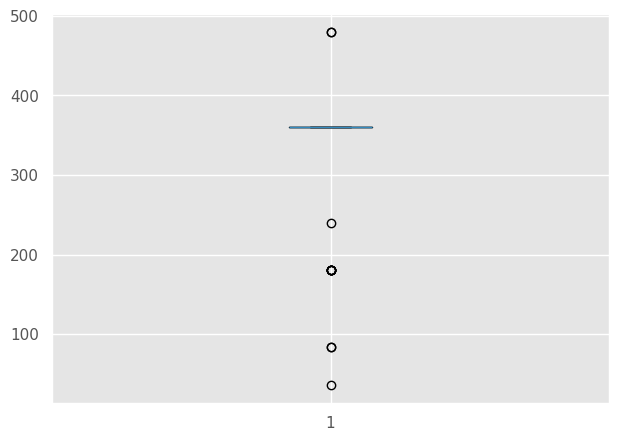

In [ ]:
#Test Your Zaka
plt.boxplot(removeNA_df['Loan_Amount_Term'])

What do you think about outliers in this case?

In this case, the presence of "fliers" (outliers) indicates that there are data points significantly different from the rest of the values in the dataset. The box plot elements such as whiskers, caps, and medians show the general distribution of the data, but the "fliers" are particularly important as they may represent extreme values that could influence the model or analysis.

You should investigate these outliers further to determine whether they are errors, legitimate extreme values, or if they need to be handled differently (e.g., through removal or transformation) depending on their impact on your analysis or model.

Plot the value_counts for 'Loan_Amount_term'

(array([ 1.,  2.,  0.,  7.,  1.,  0.,  0., 67.,  0.,  2.]),
 array([ 36. ,  80.4, 124.8, 169.2, 213.6, 258. , 302.4, 346.8, 391.2,
        435.6, 480. ]),
 <BarContainer object of 10 artists>)

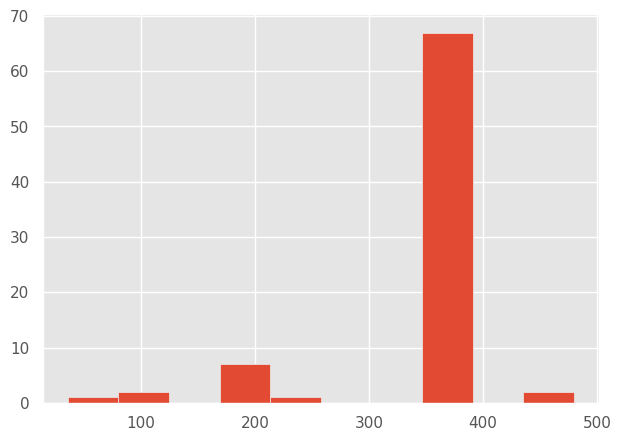

In [ ]:
#Test Your Zaka
plt.hist(removeNA_df['Loan_Amount_Term'])

Do the same for the categorical variables you have ('Dependants', 'Education', etc), using a subplot of size 4 by 2

Text(0.5, 1.0, 'Education')

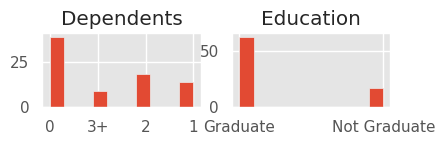

In [ ]:
#Test Your Zaka
fig=plt.figure(figsize=(4,2))

ax=fig.add_subplot(2,2,1)
ax.hist(removeNA_df['Dependents'])
ax.set_title('Dependents')

ax=fig.add_subplot(2,2,2)
ax.hist(removeNA_df['Education'])
ax.set_title('Education')


Perform CrossTabing between Gender and Loan_Status, and then plot the acceptance/rejection of loans for different Genders

In [ ]:
#Test Your Zaka
Gender_Loan= pd.crosstab(removeNA_df['Gender'],removeNA_df['Loan_Status'])
Gender_Loan

Loan_Status,N,Y
Gender,,
Female,5,9
Male,19,47


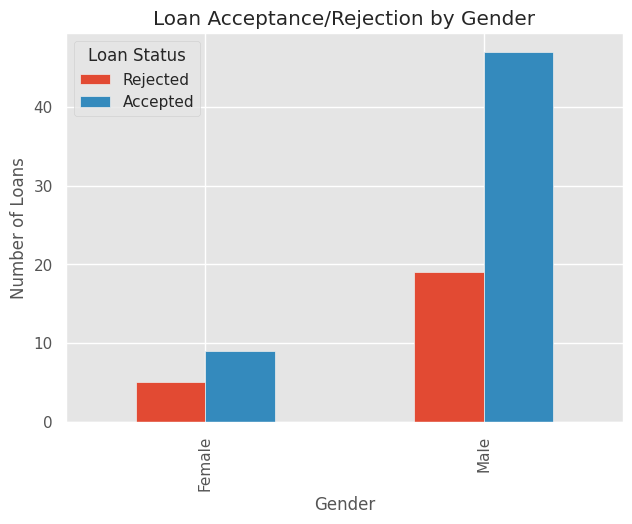

In [ ]:
Gender_Loan.plot(kind="bar")

plt.title('Loan Acceptance/Rejection by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status', labels=['Rejected', 'Accepted'])

Does the Gender affect the acceptance of the Loan?

yes

Do the same with Credit_history and Loan_Status

In [ ]:
#Test Your Zaka
Credit_Loan= pd.crosstab(removeNA_df['Credit_History'],removeNA_df['Loan_Status'])
Credit_Loan

Loan_Status,N,Y
Credit_History,,
0.0,11,1
1.0,13,55


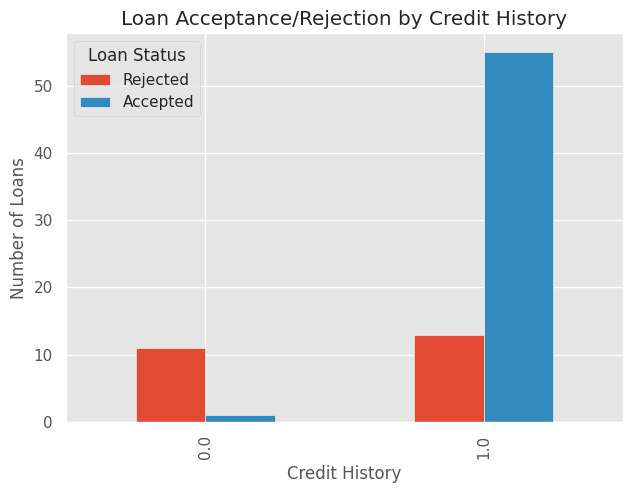

In [ ]:
Credit_Loan.plot(kind="bar")

plt.title('Loan Acceptance/Rejection by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status', labels=['Rejected', 'Accepted'])

Does the Credit History affect the acceptance of the Loan?

yes

Do the same with Dependents and Loan_Status

In [ ]:
#Test Your Zaka
Dependents_Loan= pd.crosstab(removeNA_df['Dependents'],removeNA_df['Loan_Status'])
Dependents_Loan

Loan_Status,N,Y
Dependents,,
0,14,25
1,2,12
2,6,12
3+,2,7


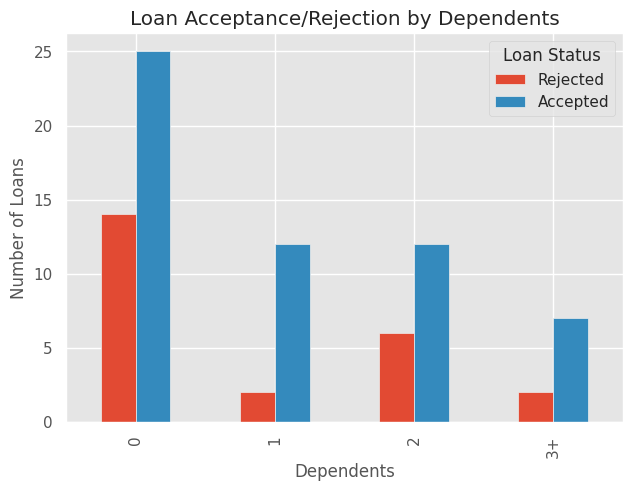

In [ ]:
Dependents_Loan.plot(kind="bar")

plt.title('Loan Acceptance/Rejection by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status', labels=['Rejected', 'Accepted'])

Does the number of dependents affect the acceptance of the Loan?

No

Do the same between Education and Loan_Status

In [ ]:
#Test Your Zaka
Education_Loan= pd.crosstab(removeNA_df['Education'],removeNA_df['Loan_Status'])
Education_Loan

Loan_Status,N,Y
Education,,
Graduate,18,45
Not Graduate,6,11


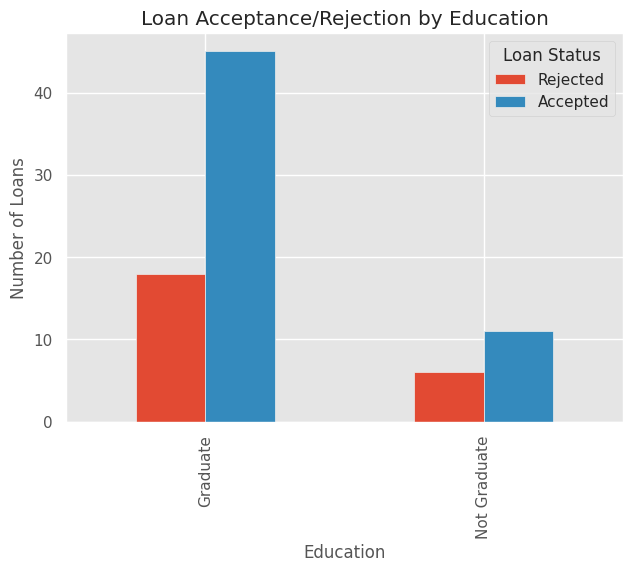

In [ ]:
Education_Loan.plot(kind="bar")

plt.title('Loan Acceptance/Rejection by Education')
plt.xlabel('Education')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status', labels=['Rejected', 'Accepted'])

Does the level of education affect the acceptance of the Loan?

yes

Do the same between Married and Loan_Status

In [ ]:
#Test Your Zaka
Married_Loan= pd.crosstab(removeNA_df['Married'],removeNA_df['Loan_Status'])
Married_Loan

Loan_Status,N,Y
Married,,
No,10,13
Yes,14,43


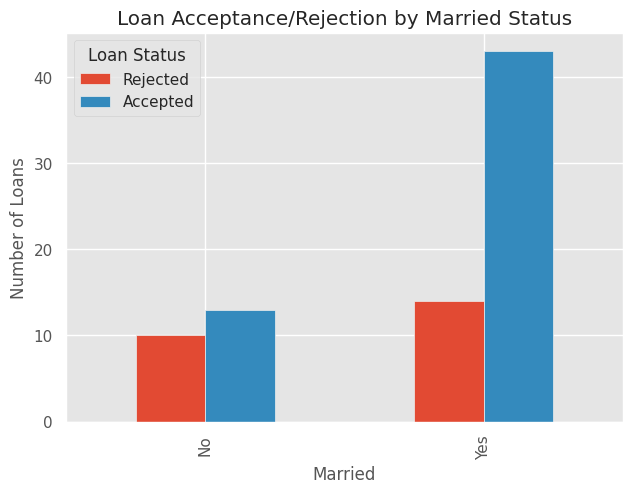

In [ ]:
Married_Loan.plot(kind="bar")

plt.title('Loan Acceptance/Rejection by Married Status')
plt.xlabel('Married')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status', labels=['Rejected', 'Accepted'])

Does the marriage affect the acceptance of the Loan?

yes

Do the same between Property_Area and Loan_Status

In [ ]:
#Test Your Zaka
#Test Your Zaka
Property_Loan= pd.crosstab(removeNA_df['Property_Area'],removeNA_df['Loan_Status'])
Property_Loan

Loan_Status,N,Y
Property_Area,,
Rural,9,18
Semiurban,10,22
Urban,5,16


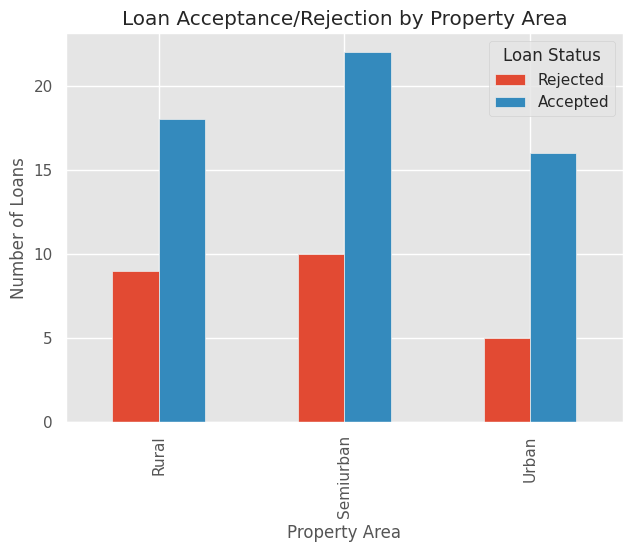

In [ ]:
Property_Loan.plot(kind="bar")

plt.title('Loan Acceptance/Rejection by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status', labels=['Rejected', 'Accepted'])

Does the Property Area affect the acceptance of the Loan?

yes

Do the same between Self_Employed and Loan_Status

In [ ]:
#Test Your Zaka
Self_Employed_Loan= pd.crosstab(removeNA_df['Self_Employed'],removeNA_df['Loan_Status'])
Self_Employed_Loan

Loan_Status,N,Y
Self_Employed,,
No,20,47
Yes,4,9


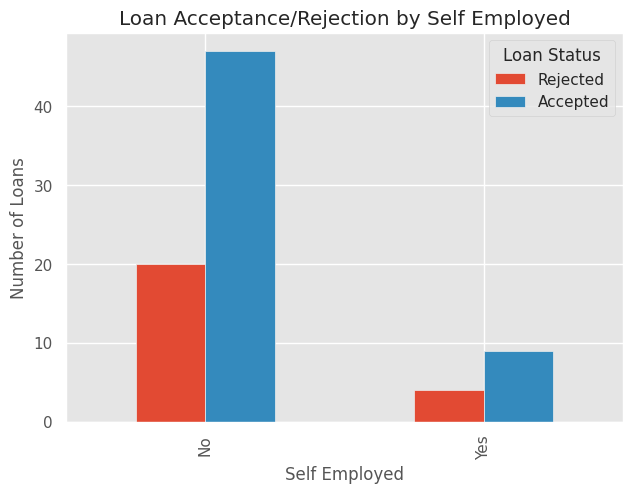

In [ ]:
Self_Employed_Loan.plot(kind="bar")

plt.title('Loan Acceptance/Rejection by Self Employed')
plt.xlabel('Self Employed')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status', labels=['Rejected', 'Accepted'])

Does the Self Employed Property affect the acceptance of the Loan?

No

Plot a Scatter Plot between Loan_Status and:
* ApplicantIncome
* CoapplicantIncome
* LoanAmount
* LoanAmount_Term

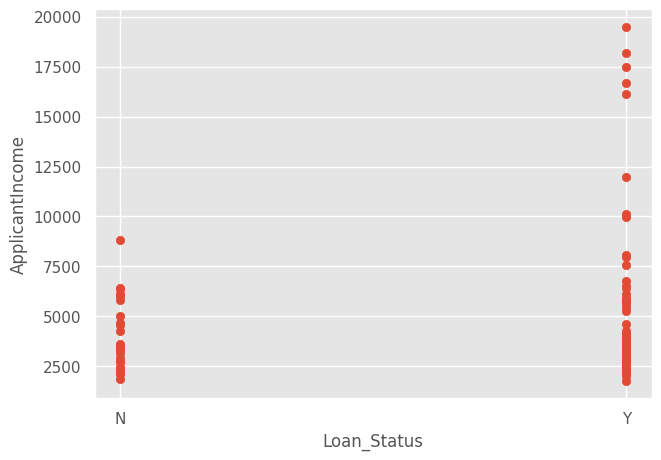

In [ ]:
#Test Your Zaka
plt.scatter(removeNA_df['Loan_Status'],removeNA_df['ApplicantIncome'])
plt.xlabel('Loan_Status')
plt.ylabel('ApplicantIncome')
plt.show()

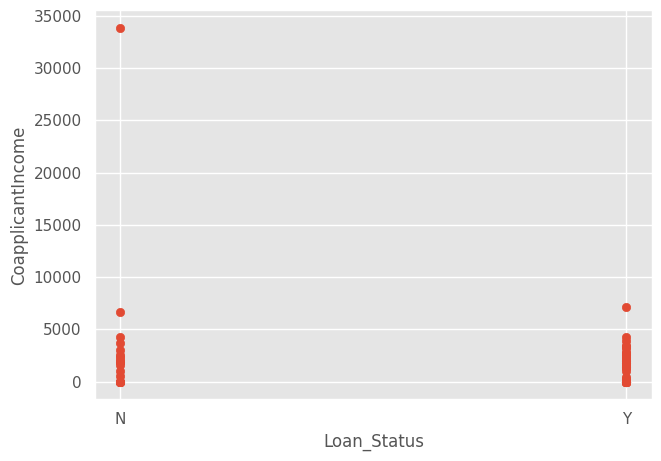

In [ ]:
#Test Your Zaka
plt.scatter(removeNA_df['Loan_Status'],removeNA_df['CoapplicantIncome'])
plt.xlabel('Loan_Status')
plt.ylabel('CoapplicantIncome')
plt.show()

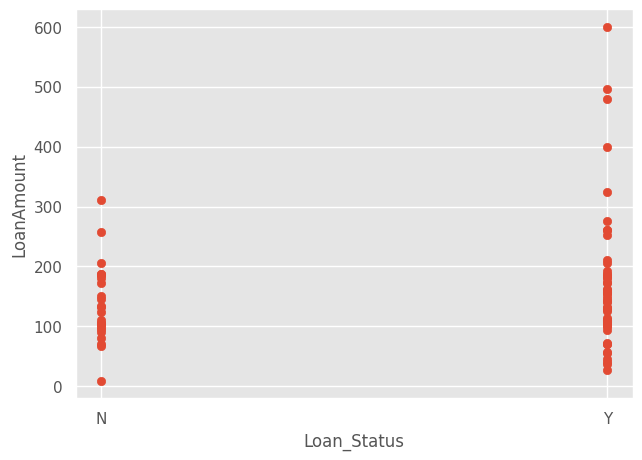

In [ ]:
#Test Your Zaka
plt.scatter(removeNA_df['Loan_Status'],removeNA_df['LoanAmount'])
plt.xlabel('Loan_Status')
plt.ylabel('LoanAmount')
plt.show()

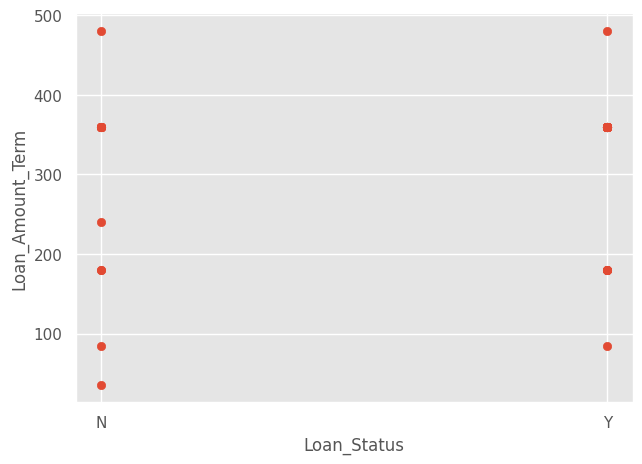

In [ ]:
#Test Your Zaka
plt.scatter(removeNA_df['Loan_Status'],removeNA_df['Loan_Amount_Term'])
plt.xlabel('Loan_Status')
plt.ylabel('Loan_Amount_Term')
plt.show()

Do you think these scatter plots gave you valuable information about the Loan_Status?

No

Group your dataframe by Loan_Status on the median Value

In [ ]:
#Test Your Zaka
grouped_by_Loan=removeNA_df.groupby('Loan_Status').median(numeric_only=True)
grouped_by_Loan

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,3494.0,768.0,127.5,360.0,1.0
Y,3873.0,746.5,136.0,360.0,1.0


What did you deduce?

There is no significant difference in applicant income between approved and rejected loans. However, having a coapplicant with an income appears to influence the loan approval status. Additionally, loan amount, loan term, and credit history show similar distributions for both approved and rejected loans.

# 4. Preprocessing
"Garbage in, garbage out".
<br>
<br>
Data should be preprocessed and cleaned to get rid of noisy data. Preprocessing includes:

- remove unsued column(s)
- remove grabage data
- convert continous data into categorical
- treat missing data
- encode categorical data
- normalization: standarize data ranges for all features (e.g., between 0 and 1)

## Remove unused columns

Remove the features that do not contribute to the prediction of the loan status

In [ ]:
#Test Your Zaka
df.drop(['LoanAmount','Loan_Amount_Term','Credit_History'],axis=1,inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status
0,LP002648,Male,Yes,0,Graduate,No,2130,6666,Semiurban,N
1,LP002652,Male,No,0,Graduate,No,5815,3666,Rural,N
2,LP002659,Male,Yes,3+,Graduate,No,3466,3428,Rural,Y
3,LP002670,Female,Yes,2,Graduate,No,2031,1632,Semiurban,Y
4,LP002682,Male,Yes,NaN,Not Graduate,No,3074,1800,Semiurban,N


## Remove grabage data

If you go back to one of the EDA steps where you saw the unique values of Dependents, you can see that you have '3+' as a value. In order to make the algorithm learn from such information, you have to replace this with a number. We will replace it by 3.

In [ ]:
#Test Your Zaka
#Test Your Zaka
df['Dependents'].replace('3+',3,inplace=True)
df.head(20)

<ipython-input-84-05a5ba23240b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].replace('3+',3,inplace=True)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status
0,LP002648,Male,Yes,0,Graduate,No,2130,6666,Semiurban,N
1,LP002652,Male,No,0,Graduate,No,5815,3666,Rural,N
2,LP002659,Male,Yes,3,Graduate,No,3466,3428,Rural,Y
3,LP002670,Female,Yes,2,Graduate,No,2031,1632,Semiurban,Y
4,LP002682,Male,Yes,NaN,Not Graduate,No,3074,1800,Semiurban,N
5,LP002683,Male,No,0,Graduate,No,4683,1915,Semiurban,N
6,LP002684,Female,No,0,Not Graduate,No,3400,0,Rural,N
7,LP002689,Male,Yes,2,Not Graduate,No,2192,1742,Semiurban,Y
8,LP002690,Male,No,0,Graduate,No,2500,0,Semiurban,Y
9,LP002692,Male,Yes,3,Graduate,Yes,5677,1424,Rural,Y


##Convert continuous data into categorical

Search for the feature that is contionuous but should be categorical and convert it

In [ ]:
#Test Your Zaka
df['Dependents'].astype('category')

,Dependents
0,0
1,0
2,3
3,2
4,NaN
...,...
96,0
97,3
98,1
99,2


## Treat missing data
- fill missing categorical data & discrete data with mode
- fill missing continuous data with mean


In [ ]:
#Test Your Zaka
df.isnull().sum()

,0
Loan_ID,0
Gender,3
Married,0
Dependents,3
Education,0
Self_Employed,5
ApplicantIncome,0
CoapplicantIncome,0
Property_Area,0
Loan_Status,0


In [ ]:
gender_mode=df['Gender'].mode()[0]
married_mode=df['Married'].mode()[0]
employed_mode=df['Self_Employed'].mode()[0]

df['Gender'].fillna(gender_mode,inplace=True)
df['Married'].fillna(married_mode,inplace=True)
df['Self_Employed'].fillna(employed_mode,inplace=True)


df['Dependents'] = pd.to_numeric(df['Dependents'])
dependents_mean=df['Dependents'].mean()
df['Dependents'].fillna(dependents_mean,inplace=True)


<ipython-input-87-b119ec5bd68f>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Married'].fillna(married_mode,inplace=True)
<ipython-input-87-b119ec5bd68f>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

## Check if any null value exist

In [ ]:
#Test Your Zaka
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            101 non-null    object 
 1   Gender             101 non-null    object 
 2   Married            101 non-null    object 
 3   Dependents         101 non-null    float64
 4   Education          101 non-null    object 
 5   Self_Employed      101 non-null    object 
 6   ApplicantIncome    101 non-null    int64  
 7   CoapplicantIncome  101 non-null    int64  
 8   Property_Area      101 non-null    object 
 9   Loan_Status        101 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 8.0+ KB


## Encode categorical data

Go over your categorical features and encode them (change their values to be numerical to be able to feed them to an algorithm and get a model in the end)

In [ ]:
#Test Your Zaka
pd.get_dummies(df,prefix='Property_Area',prefix_sep='.',columns=['Property_Area'])

gender={'Male':1,'Female':0}
married={'Yes':1,'No':0}
employed={'Yes':1,'No':0}
education={'Graduate':1,'Not Graduate':0}
loan={'Y':1,'N':0}

df['Gender']=df['Gender'].apply(lambda x: gender[x])
df['Married']=df['Married'].apply(lambda x: married[x])
df['Self_Employed']=df['Self_Employed'].apply(lambda x: employed[x])
df['Education']=df['Education'].apply(lambda x: education[x])
df['Loan_Status']=df['Loan_Status'].apply(lambda x: loan[x])

df.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status
0,LP002648,1,1,0.000000,1,0,2130,6666,Semiurban,0
1,LP002652,1,0,0.000000,1,0,5815,3666,Rural,0
2,LP002659,1,1,3.000000,1,0,3466,3428,Rural,1
3,LP002670,0,1,2.000000,1,0,2031,1632,Semiurban,1
4,LP002682,1,1,0.908163,0,0,3074,1800,Semiurban,0


## Normalization

Normalize data ranges for all features (e.g., between 0 and 1)
First compute the maximum of each feature, and then divide each column by its maximum. After it, describe the data

In [ ]:
#Test Your Zaka
df_max=df.max()
df_max


,0
Loan_ID,LP002990
Gender,1
Married,1
Dependents,3.0
Education,1
Self_Employed,1
ApplicantIncome,19484
CoapplicantIncome,41667
Property_Area,Urban
Loan_Status,1


In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns
df=df[numerical_cols].divide(df_max[numerical_cols])
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Status
count,101.0,101.0,101.0,101.0,101.0,101.000000,101.0,101.0
unique,2.0,2.0,5.0,2.0,2.0,97.000000,55.0,2.0
top,1.0,1.0,0.0,1.0,0.0,0.174502,0.0,1.0
freq,83.0,68.0,50.0,77.0,86.0,3.000000,44.0,67.0


# 6. Training & Validating

Create a variable x for the inputs (Fetaures), and a variable y for the output ('Loan_Status')
Then, split the data between training (70%) and testing (30%).

In [ ]:
#Test Your Zaka
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##Creating & Fitting the model

Create a Logistic Regression Model, and fit it on the training data you have

In [ ]:
#Test Your Zaka
y_train = y_train.astype(int)
y_test = y_test.astype(int)
model=LogisticRegression()
model.fit(x_train,y_train)



LogisticRegression()

##Validating the model

Validate your model on the testing data, and compute the accuracy score of your predictions

In [ ]:
#Test Your Zaka
print(y_test.isnull().sum())
prediction=model.predict(x_test)
accuracy_score(y_test,prediction)

0


0.6451612903225806

#7. Feature Importance

Evaluate the feature importance in your resulting model, and plot it

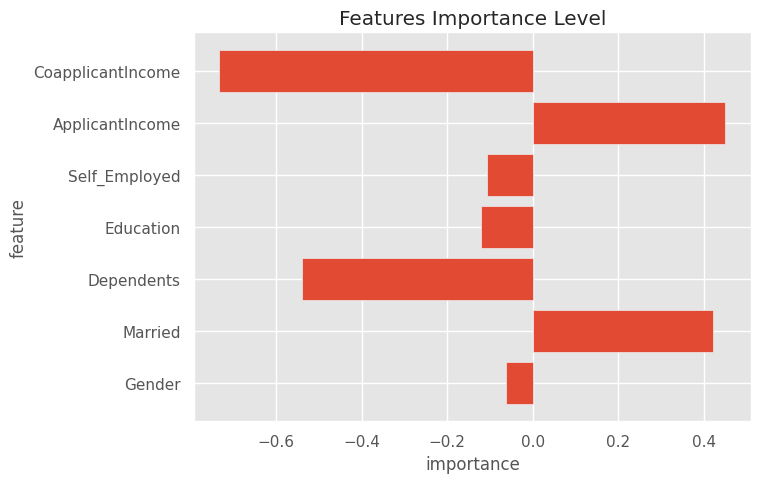

In [ ]:
#Test Your Zaka
columns_names = df.columns[0:-1].values
features_importance = model.coef_.flatten()

plt.barh(columns_names, features_importance)
plt.title('Features Importance Level')
plt.xlabel('importance')
plt.ylabel('feature')
plt.show()

What's the most important feature?

The most important feature is Applicant income
